In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as npimg
from os import listdir

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5C0E-61B9

 Directory of C:\Users\Personal00\Desktop\new desk\Python\deep learning\image classification using cnn for flowsers

04-10-2023  07:53 PM    <DIR>          .
04-10-2023  07:53 PM    <DIR>          ..
04-10-2023  06:58 PM    <DIR>          .ipynb_checkpoints
04-10-2023  07:31 PM    <DIR>          flowers
04-10-2023  07:53 PM           388,124 image classification using cnn for flowsers.ipynb
               1 File(s)        388,124 bytes
               4 Dir(s)  41,010,970,624 bytes free


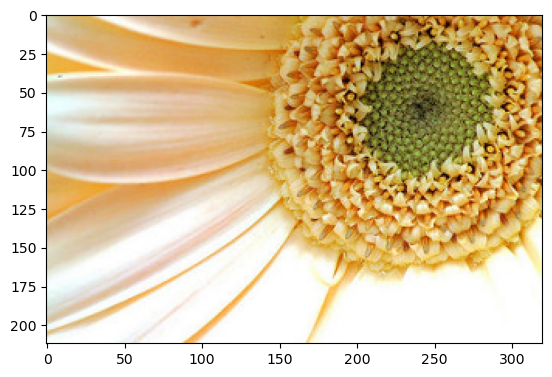

In [6]:
img=npimg.imread('flowers/flowers/flower_photos/train/daisy/5673551_01d1ea993e_n.jpg')
plt.imshow(img)

In [22]:
list_class=listdir('flowers/flowers/flower_photos/train')
list_class

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [12]:
# define all parameteres
img_width , img_hight=150,150
no_of_training_samples=100
no_of_validation_samples=100
total_batch_size=10
no_of_epochs=20
training_set_loc = 'flowers/flowers/flower_photos/train'
testing_set_loc = 'flowers/flowers/flower_photos/test'
validation_set_loc = 'flowers/flowers/flower_photos/validation'
no_of_classes=len(list_class)

In [8]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channel_first':
    input_shape= (3, img_width,img_hight)
else :
    input_shape= (img_width, img_hight,3)

In [19]:
train_data_gen=ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,
                                  shear_range=0.2)
vali_data_gen=ImageDataGenerator(rescale=1/255) # brigthning rgb value from 0-1
test_data_gen=ImageDataGenerator(rescale=1/255)
train_generator=train_data_gen.flow_from_directory(training_set_loc,target_size=(img_width,img_hight),
                                                   batch_size=total_batch_size,
                                                   class_mode='categorical',
                                                   classes=list_class)
validation_generator=vali_data_gen.flow_from_directory(validation_set_loc,
                                                    target_size=(img_width,img_hight),
                                                   batch_size=total_batch_size,
                                                   class_mode='categorical',
                                                   classes=list_class)
test_generator=test_data_gen.flow_from_directory(testing_set_loc,
                                                 target_size=(img_width,img_hight),
                                                   batch_size=total_batch_size,
                                                   class_mode='categorical',
                                                   classes=list_class)

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


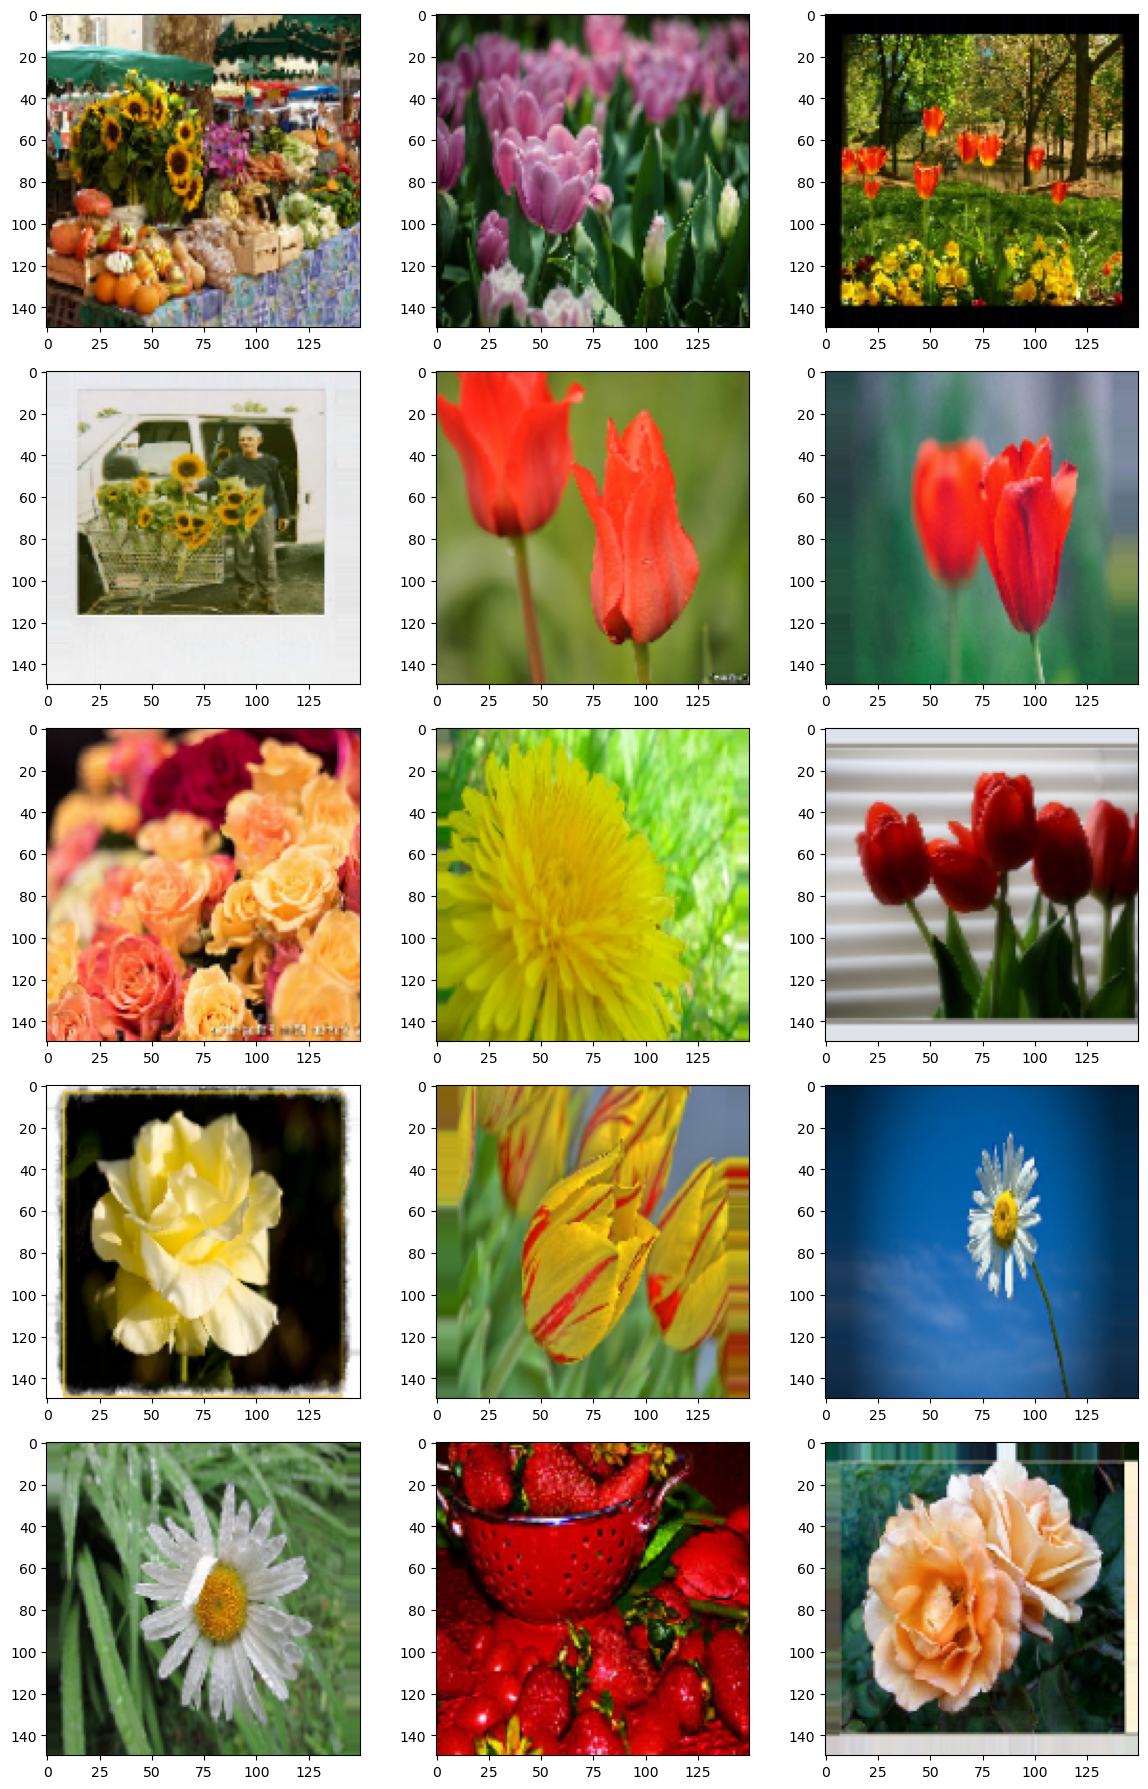

In [26]:
# how training data looks
plt.figure(figsize=(12,18))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for x_data, y_data in train_generator:
        image=x_data[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()